# 🛡️ Finding Pittsburgh’s Safest Neighborhood

## 👋 Introduction

In this project, we set out to identify the **safest neighborhood in Pittsburgh** using publicly available data. Since "safety" can mean different things, we approached it from multiple angles.

To build a well-rounded safety metric, we analyzed four datasets from the [WPRDC](https://data.wprdc.org/), each offering a different perspective:

To define and measure neighborhood-level safety, we considered various aspects of public safety, ranging from crime rates to emergency incidents:

### 📦 Datasets We Used

1. 🚔 **Non-Traffic Citations**  
   Captures low-level offenses like disorderly conduct and public drunkenness — useful for assessing day-to-day disturbances.

2. 👮 **Police Arrests**  
   Reflects serious offenses and helps us understand the distribution of criminal activity across neighborhoods.

3. 🚒 **Fire Incidents**  
   Measures infrastructure safety and emergency preparedness through the number of reported fires.

4. 🔫 **Firearm Seizures**  
   Indicates the presence of illegal firearms — a direct marker of neighborhood-level risk.

---

## 🧪 Our Safety Metric

We designed a  **Safety Score** by:
- Counting incidents per dataset for each neighborhood
- Normalizing the values (so different scales wouldn’t bias the results)
- Inverting the scores (fewer incidents = safer)
- Averaging across all four to generate a final safety score per neighborhood

This way, we could fairly rank neighborhoods and visualize which ones emerged as the safest zones in the city.

Stay tuned for our visualizations and results


### First DataSet: 
Mariia Sierova
## 🚔 Non-Traffic Citations

This dataset includes citations for lower-level offenses such as public drunkenness, disorderly conduct, and open container violations. These types of incidents don’t involve vehicles but still reflect overall public behavior and order in a neighborhood.

We used this data to get a sense of which areas experience more frequent minor disturbances, which can affect how safe or comfortable a neighborhood feels to live in.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

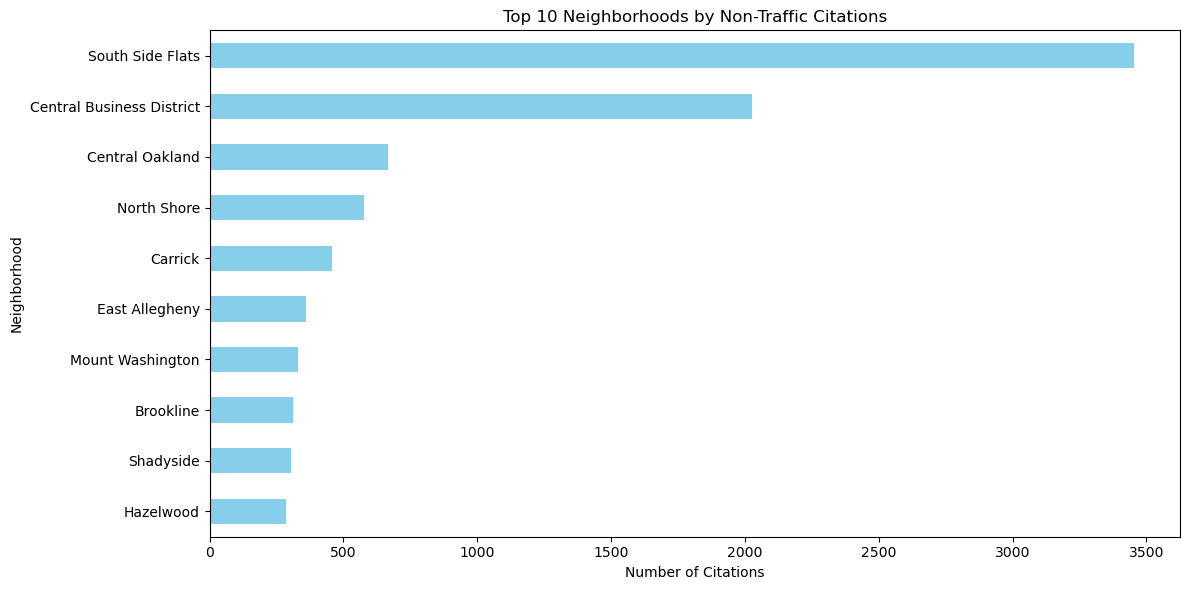

In [3]:
citations = pd.read_csv('data/citations.csv')
# Keep key columns
cols_to_keep = ['GENDER', 'RACE', 'AGE', 'CITEDTIME', 'OFFENSES', 'NEIGHBORHOOD', 'X', 'Y']
citations = citations[cols_to_keep]
# Drop rows with missing neighborhood 
citations = citations.dropna(subset=['NEIGHBORHOOD'])
# Convert CITEDTIME to datetime
citations['CITEDTIME'] = pd.to_datetime(citations['CITEDTIME'], errors='coerce')
# Extract year for time-based analysis
citations['YEAR'] = citations['CITEDTIME'].dt.year

# Count citations per neighborhood
neighborhood_counts = citations['NEIGHBORHOOD'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
neighborhood_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Neighborhoods by Non-Traffic Citations')
plt.xlabel('Number of Citations')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()

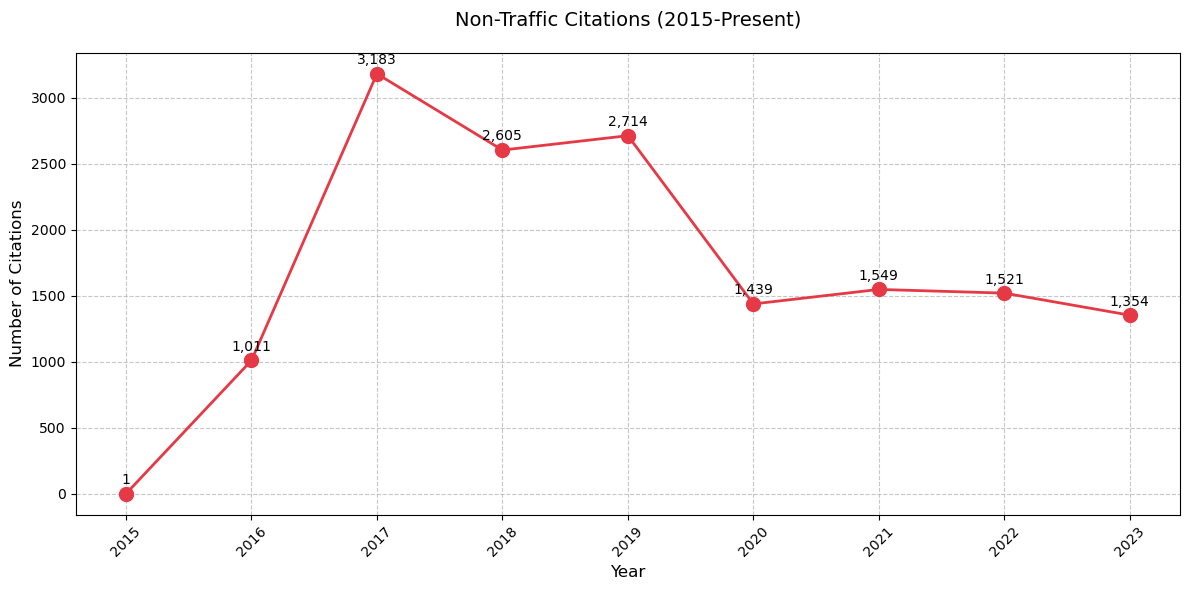

In [4]:
# Filter data for 2015 and later
citations_2015plus = citations[citations['YEAR'] >= 2015]

# Group by year and count citations
annual_counts = citations_2015plus.groupby('YEAR').size()

# Plot with enhanced styling
plt.figure(figsize=(12, 6))
ax = annual_counts.plot(marker='o', 
                       linestyle='-', 
                       color='#e63946', 
                       linewidth=2, 
                       markersize=10)

# Customize the plot
plt.title('Non-Traffic Citations (2015-Present)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Citations', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add value labels on top of each point
for x, y in zip(annual_counts.index, annual_counts.values):
    ax.text(x, y+50, f'{y:,}', ha='center', va='bottom', fontsize=10)

# Adjust x-axis ticks to show every year
plt.xticks(annual_counts.index, rotation=45)

plt.tight_layout()
plt.show()

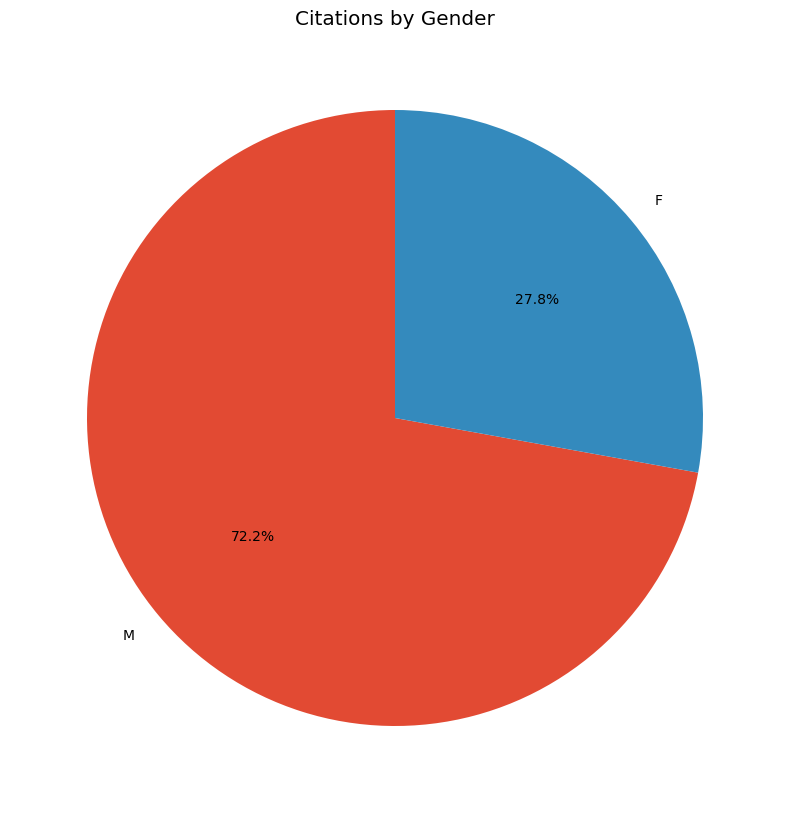

In [43]:
gender_counts = citations['GENDER'].value_counts()

plt.figure(figsize=(10, 10))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Citations by Gender')
plt.ylabel('')
plt.show()

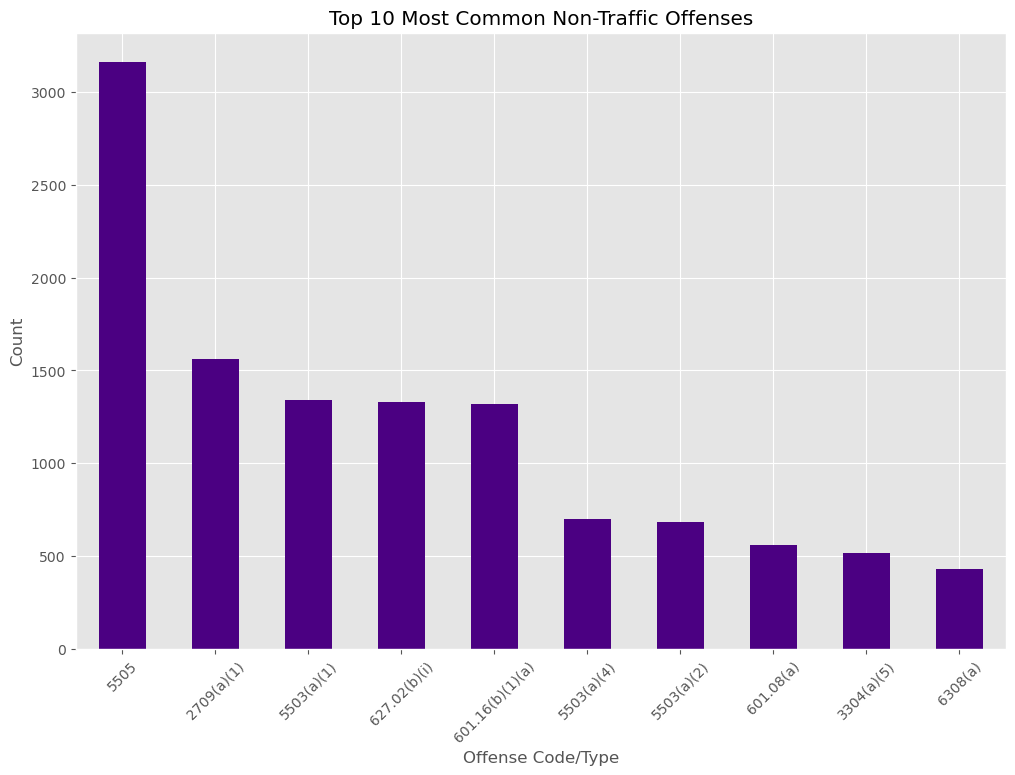

,Statute Code,Legal Definition
0,5505,Public Drunkenness
1,5503(a)(1),Disorderly Conduct - Hazardous Physical Offense
2,5503(a)(2),Disorderly Conduct - Unreasonable Noise
3,5503(a)(4),Disorderly Conduct - Obscene Language/Gestures
4,2709(a)(1),Harassment - Communication
5,3304(a)(5),Criminal Mischief - Damage Property
6,6308(a),Underage Drinking
7,627.02(b)(i),Public Urination/Defecation
8,601.16(b)(1)(a),Littering in Public Space
9,601.08(a),Open Container Violation


In [ ]:
# Extract primary offense (first part of OFFENSES string)
citations['PRIMARY_OFFENSE'] = citations['OFFENSES'].str.split().str[0]

# Top 10 offenses
top_offenses = citations['PRIMARY_OFFENSE'].value_counts().head(10)

plt.figure(figsize=(12, 8))
top_offenses.plot(kind='bar', color='indigo')
plt.title('Top 10 Most Common Non-Traffic Offenses')
plt.xlabel('Offense Code/Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Decoder dictionary
offense_decoder = {
    '5505': 'Public Drunkenness',
    '5503(a)(1)': 'Disorderly Conduct - Hazardous Physical Offense',
    '5503(a)(2)': 'Disorderly Conduct - Unreasonable Noise',
    '5503(a)(4)': 'Disorderly Conduct - Obscene Language/Gestures',
    '2709(a)(1)': 'Harassment - Communication',
    '3304(a)(5)': 'Criminal Mischief - Damage Property',
    '6308(a)': 'Underage Drinking',
    '627.02(b)(i)': 'Public Urination/Defecation',
    '601.16(b)(1)(a)': 'Littering in Public Space',
    '601.08(a)': 'Open Container Violation'
}

# Create and display the clean mapping table
mapping_table = pd.DataFrame({
    'Statute Code': list(offense_decoder.keys()),
    'Legal Definition': list(offense_decoder.values())
})

# Style with clean formatting
styled_table = mapping_table.style \
    .set_properties(**{
        'text-align': 'left',
        'font-family': 'Arial'
    }) \
    .set_caption('Pennsylvania/Pittsburgh Offense Code Reference') \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#2a9d8f'), 
                 ('color', 'white'),
                 ('font-weight', 'bold')]
    }])

styled_table

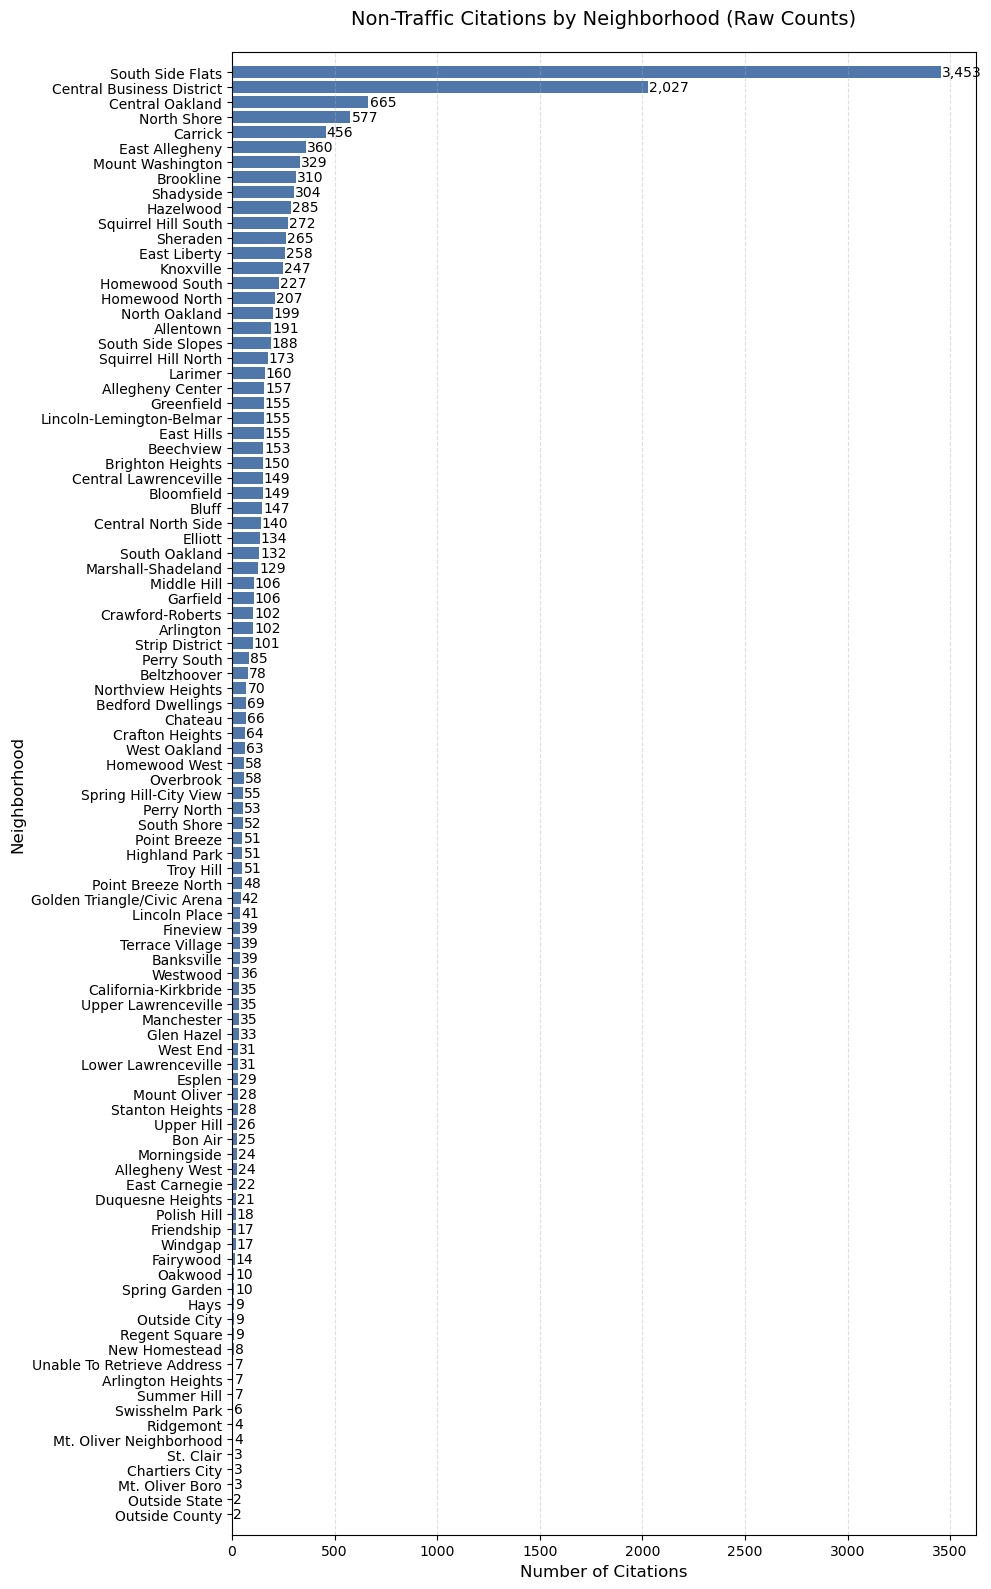

In [7]:
# Get neighborhood counts (sorted ascending)
neighborhood_counts = citations['NEIGHBORHOOD'].value_counts().sort_values()

# Create plot
plt.figure(figsize=(10, 16))
bars = plt.barh(neighborhood_counts.index, neighborhood_counts.values, 
               color='#4f77aa', height=0.8)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, 
             f'{int(width):,}', 
             va='center', ha='left', fontsize=10)

# Formatting
plt.title('Non-Traffic Citations by Neighborhood (Raw Counts)', fontsize=14, pad=20)
plt.xlabel('Number of Citations', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.margins(y=0.01)
plt.tight_layout()
plt.show()

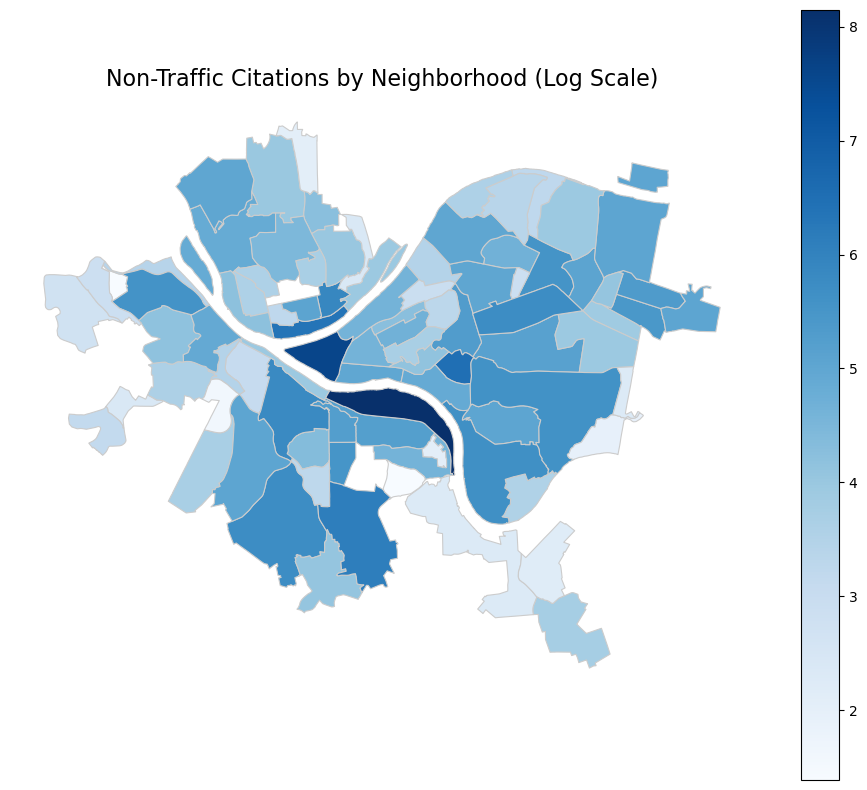

In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Load citation data
citations = pd.read_csv('data/citations.csv')

# Keep relevant columns
cols_to_keep = ['NEIGHBORHOOD', 'X', 'Y']
citations = citations[cols_to_keep]

# Drop rows without a neighborhood
citations = citations.dropna(subset=['NEIGHBORHOOD'])

# Count citations per neighborhood
citation_counts = citations['NEIGHBORHOOD'].value_counts().reset_index()
citation_counts.columns = ['NEIGHBORHOOD', 'Citation_Count']

# Load the shapefile for Pittsburgh neighborhoods
gdf = gpd.read_file("data/Neighborhoods_.shp")

# Merge citation counts with geodata
merged = gdf.merge(citation_counts, how='left', left_on='hood', right_on='NEIGHBORHOOD')

# Add a small constant to avoid log(0)
merged['Citation_Count_Log'] = np.log1p(merged['Citation_Count'])

fig, ax = plt.subplots(figsize=(12, 10))
merged.plot(column='Citation_Count_Log', 
            cmap='Blues', 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8', 
            legend=True)

ax.set_title('Non-Traffic Citations by Neighborhood (Log Scale)', fontsize=16)
ax.axis('off')
plt.show()



# Second Data Set: Arrests 

### By identifying which neighborhoods have the fewest arrests, the data also highlights which areas are likely the safest in the city. The neighborhoods with the highest number of arrests were consistent with areas typically associated with higher crime rates, and may not be safe. 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the dataset
arrests = pd.read_csv('data/pgharrests.csv', on_bad_lines='skip')

# Load Shapefile for Pittsburgh Neighborhoods
gdf = gpd.read_file("data/City_of_Pittsburgh_Neighborhoods.shp")

# Keep key columns
cols_to_keep = ['AGE', 'GENDER', 'RACE', 'ARRESTTIME', 'ARRESTLOCATION', 'OFFENSES', 'INCIDENTNEIGHBORHOOD', 'X', 'Y']
arrests = arrests[cols_to_keep]

# Drop rows with missing neighborhood 
arrests = arrests.dropna(subset=['INCIDENTNEIGHBORHOOD'])

# Convert ARRESTTIME to datetime
arrests['ARRESTTIME'] = pd.to_datetime(arrests['ARRESTTIME'], errors='coerce')

# Extract year for time-based analysis
arrests['YEAR'] = arrests['ARRESTTIME'].dt.year

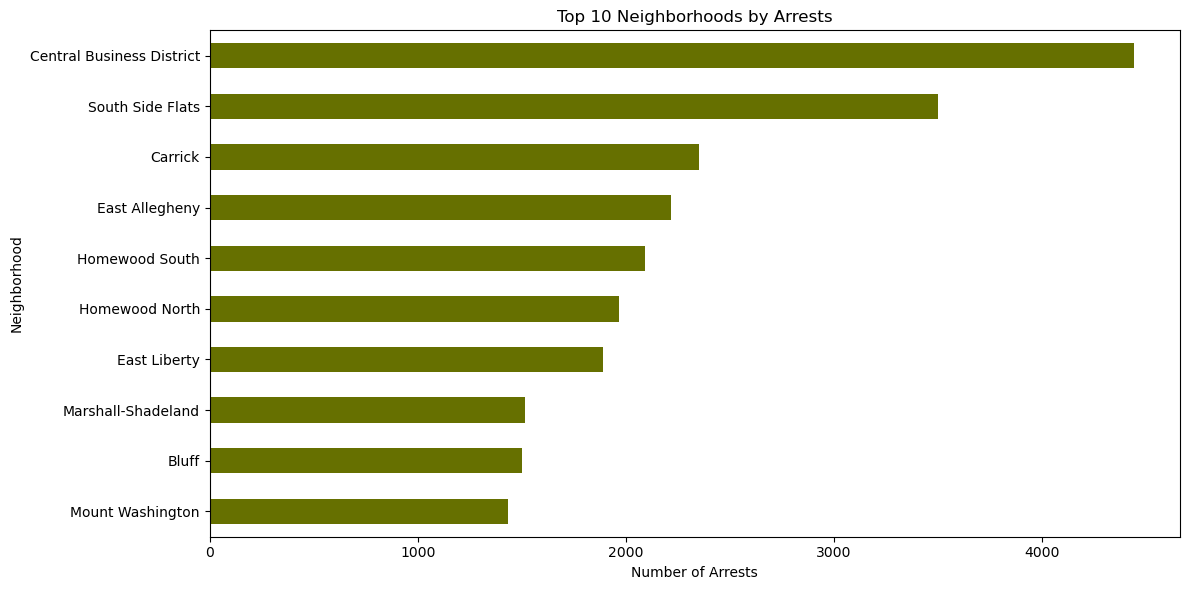

In [11]:
# Count citations per neighborhood
neighborhood_counts = arrests['INCIDENTNEIGHBORHOOD'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
neighborhood_counts.sort_values().plot(kind='barh', color='#667000')
plt.title('Top 10 Neighborhoods by Arrests')
plt.xlabel('Number of Arrests')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()

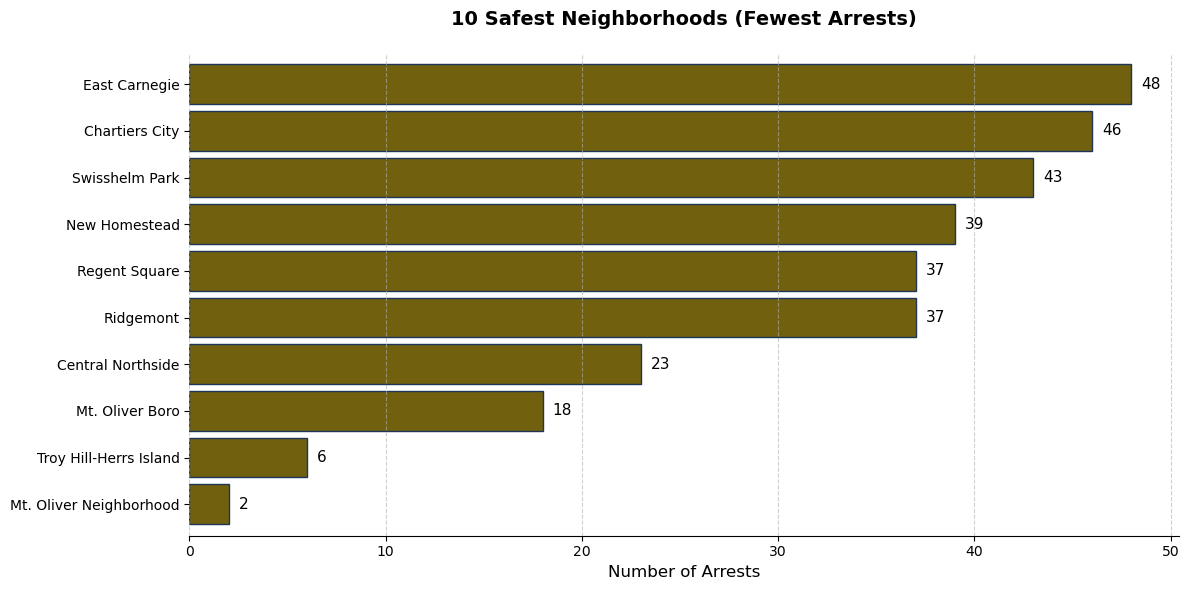

In [12]:
# Count citations per neighborhood and get BOTTOM 10
neighborhood_counts = arrests['INCIDENTNEIGHBORHOOD'].value_counts().nsmallest(10)

# Create the plot
plt.figure(figsize=(12, 6))
ax = neighborhood_counts.sort_values(ascending=True).plot(
    kind='barh',
    color='#71610e',  
    edgecolor='#1d3557',
    width=0.85
)

# Customize appearance
plt.title('10 Safest Neighborhoods (Fewest Arrests)', 
         fontsize=14, pad=20, weight='bold')
plt.xlabel('Number of Arrests', fontsize=12)
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add value labels
for i, v in enumerate(neighborhood_counts.sort_values()):
    ax.text(v + 0.5, i, f"{int(v)}", 
            color='black', 
            va='center',
            fontsize=11)

# Remove top/right spines
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

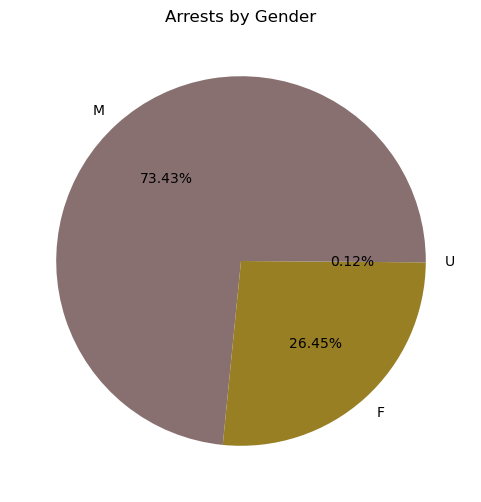

In [13]:
gender_counts = arrests['GENDER'].value_counts()

plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%.2f%%', colors=['#897070', '#987f24'])
plt.title('Arrests by Gender')
plt.ylabel('')
plt.show()

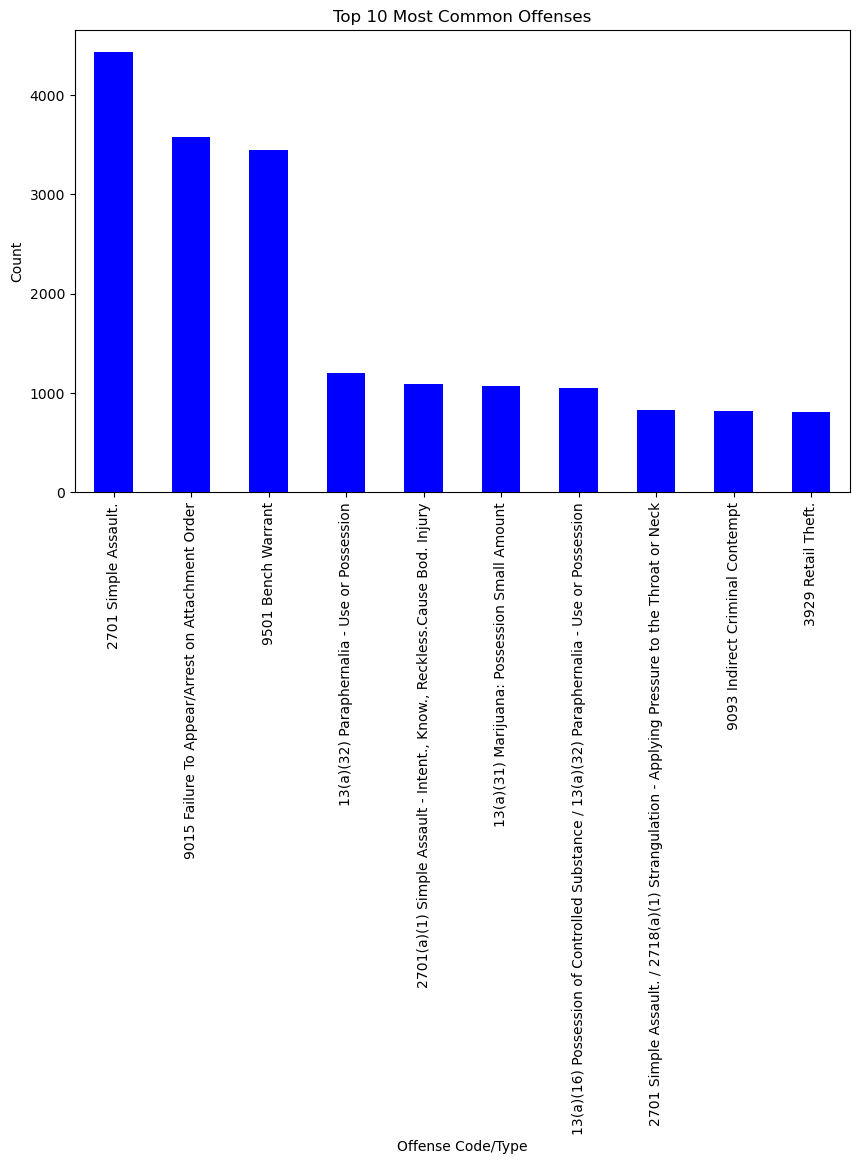

In [14]:

# Top 10 offenses
top_offenses = arrests['OFFENSES'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_offenses.plot(kind='bar', color='blue')
plt.title('Top 10 Most Common Offenses')
plt.xlabel('Offense Code/Type')
plt.ylabel('Count')
plt.xticks
plt.show()

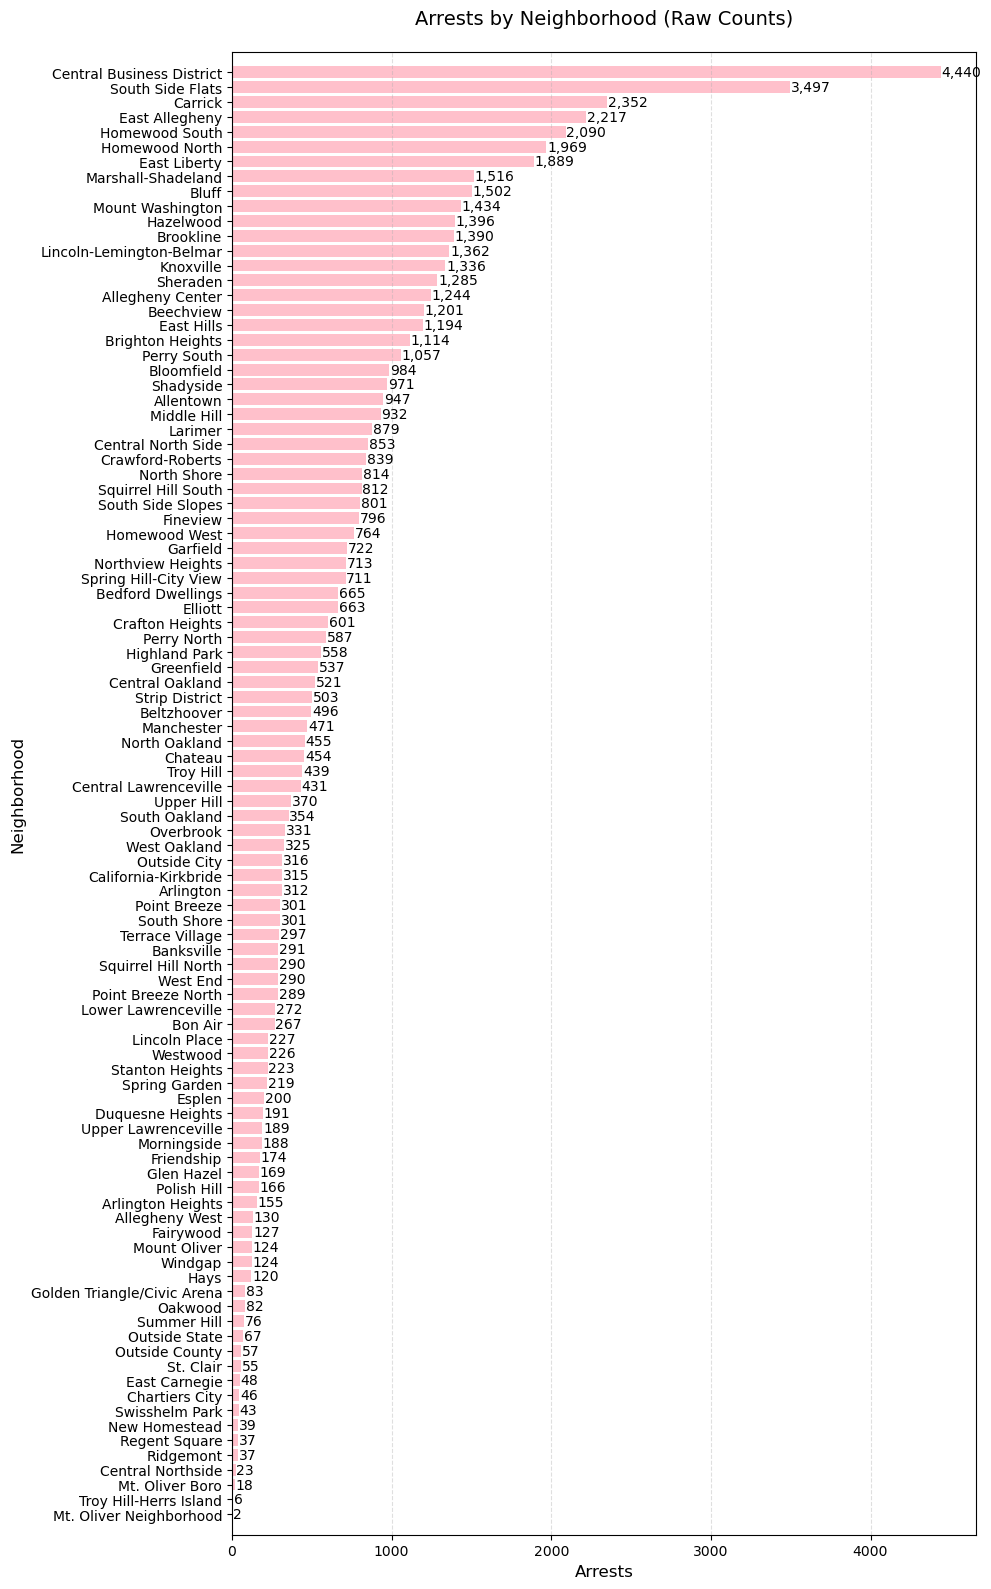

In [15]:
# Get neighborhood counts (sorted ascending)
neighborhood_counts = arrests['INCIDENTNEIGHBORHOOD'].value_counts().sort_values()

# Create plot
plt.figure(figsize=(10, 16))
bars = plt.barh(neighborhood_counts.index, neighborhood_counts.values, 
               color='pink', height=0.8)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, 
             f'{int(width):,}', 
             va='center', ha='left', fontsize=10)

# Formatting
plt.title('Arrests by Neighborhood (Raw Counts)', fontsize=14, pad=20)
plt.xlabel('Arrests', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.margins(y=0.01)
plt.tight_layout()
plt.show()

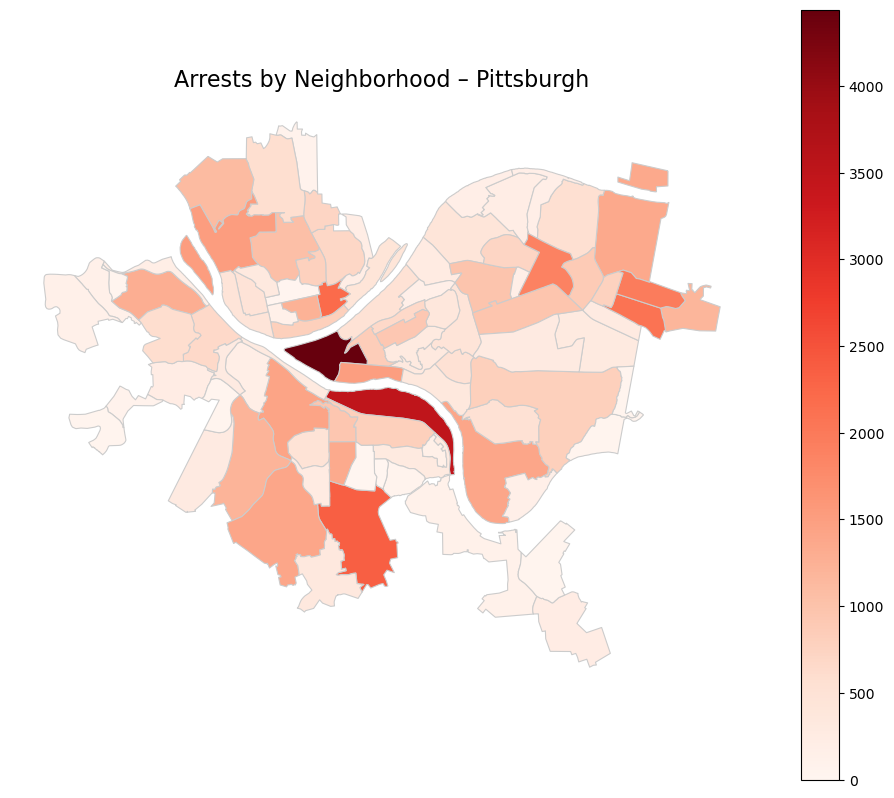

In [16]:
arrest_counts = arrests.groupby('INCIDENTNEIGHBORHOOD').size().reset_index(name='Arrest_Count')

 
 
merged = gdf.merge(arrest_counts, how="left", left_on="HOOD", right_on="INCIDENTNEIGHBORHOOD")

# 5. Fill missing data with 0 (neighborhoods with no arrests)
merged['Arrest_Count'] = merged['Arrest_Count'].fillna(0)

# 6. Plot
fig, ax = plt.subplots(figsize=(12, 10))
merged.plot(column='Arrest_Count', 
            cmap='Reds', 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8', 
            legend=True)

ax.set_title('Arrests by Neighborhood – Pittsburgh', fontsize=16)
ax.axis('off')
plt.show()

# Conclusions

#### The results of the analysis aligned closely with what I personally already assumed about crime patterns in the city, with one exception. I was surprised with the number of arrests in Mt Washington. There weren’t any unexpected trends in the demographics or timing of arrests. The data provided a clear view of where and when arrests are most common. Overall, the findings confirmed existing perceptions about neighbohoods with good reputations, only revealing one major surprise, in my opinion.

# Third Data Set - Fire Incidents

### Looking at which neighborhoods had the least number of fire incidents helps show which areas might be safer when it comes to fire risk. On the other hand, neighborhoods with a lot of fire incidents could have things like older buildings, safety issues, or just more people living there. This kind of data can help the city know where to focus on fire prevention and safety improvements.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
fire = pd.read_csv('data/fire_incidents.csv')  # change filename if needed

# Inspect data structure
# fire.head()
# fire.info()

# Keep relevant columns
fire_cols = ['neighborhood', 'incident_type', 'alarm_time', 'address', 'type_description']
fire = fire[fire_cols]

# Drop missing neighborhoods
fire = fire.dropna(subset=['neighborhood'])

# Convert datetime column
fire['alarm_time'] = pd.to_datetime(fire['alarm_time'], errors='coerce')
fire['year'] = fire['alarm_time'].dt.year

In [18]:
# Group by neighborhood and count incidents
fire_counts = fire['neighborhood'].value_counts().reset_index()
fire_counts.columns = ['Neighborhood', 'Fire Incidents']

# Normalize by population if needed (with merge)
# pop_df = pd.read_csv('neighborhood_population.csv')
# fire_counts = fire_counts.merge(pop_df, on='Neighborhood')
# fire_counts['Incidents per 1000'] = fire_counts['Fire Incidents'] / fire_counts['Population'] * 1000

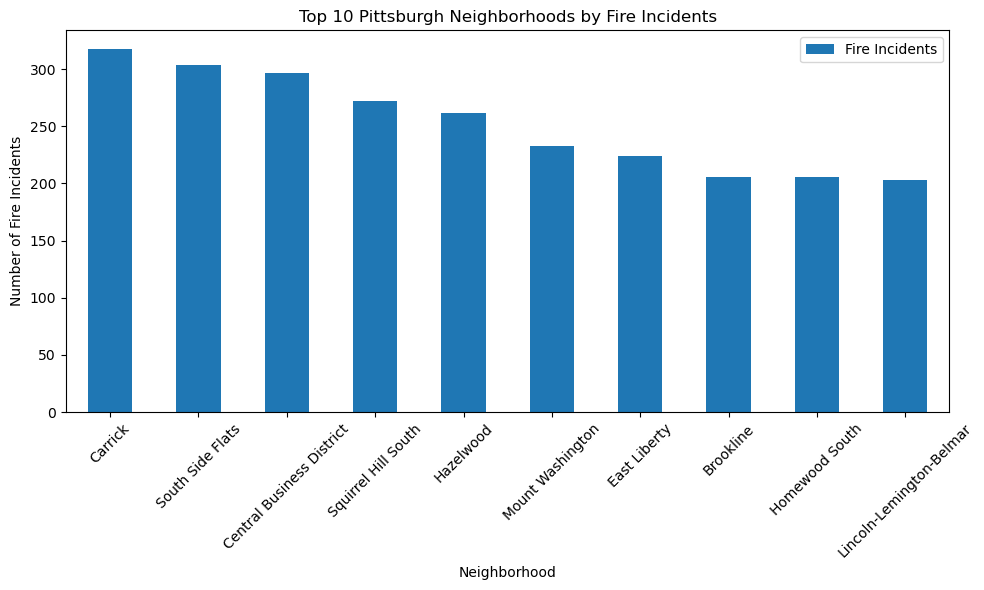

In [19]:
# Top 10 neighborhoods with most fire incidents
fire_counts.head(10).plot(kind='bar', x='Neighborhood', y='Fire Incidents',
                          title='Top 10 Pittsburgh Neighborhoods by Fire Incidents',
                          figsize=(10,6))
plt.ylabel('Number of Fire Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

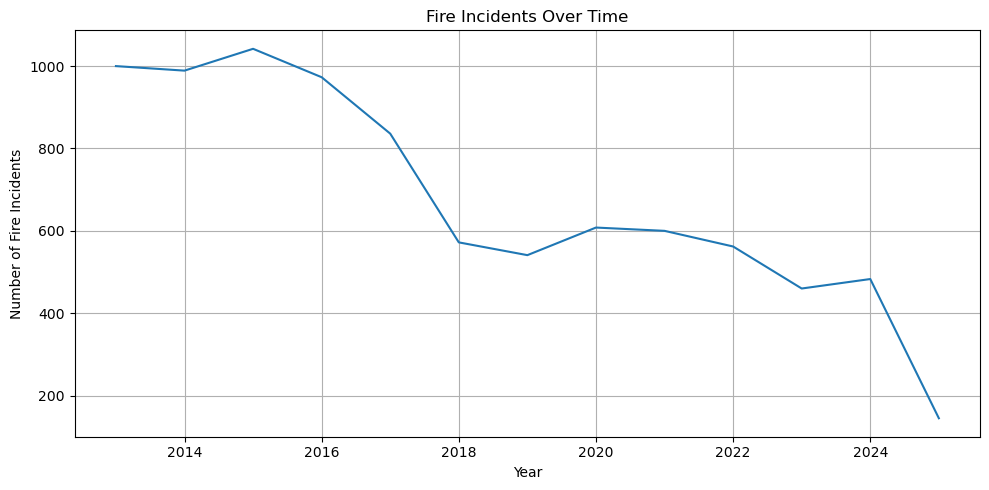

In [20]:
# Convert alarm_time and extract year
fire['alarm_time'] = pd.to_datetime(fire['alarm_time'], errors='coerce')
fire['year'] = fire['alarm_time'].dt.year

# Drop rows with null years
fire_by_year = fire.dropna(subset=['year'])

# Count incidents per year
yearly_counts = fire_by_year['year'].value_counts().sort_index()
yearly_counts.plot(kind='line', title='Fire Incidents Over Time', figsize=(10, 5))
plt.xlabel('Year')
plt.ylabel('Number of Fire Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()

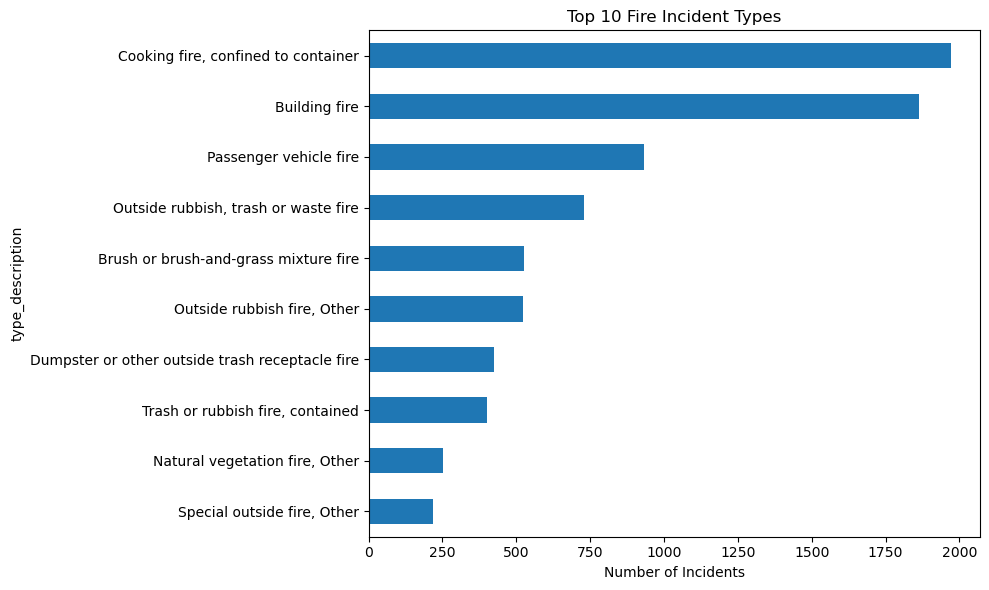

In [21]:
incident_types = fire['type_description'].value_counts().head(10)
incident_types.plot(kind='barh', title='Top 10 Fire Incident Types', figsize=(10, 6))
plt.xlabel('Number of Incidents')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

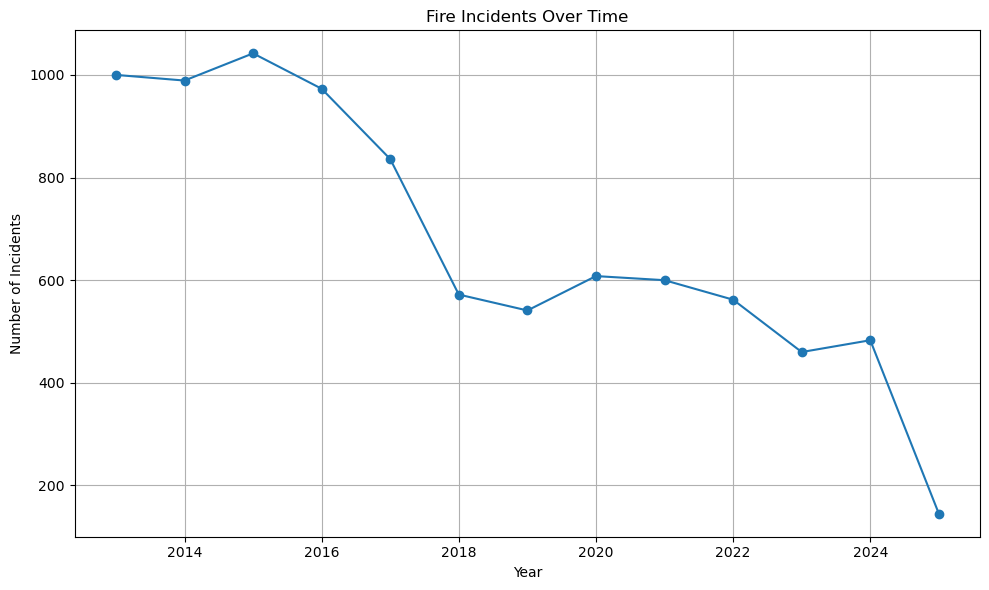

In [22]:
# Remove the comma from year assignment (bug fix)
fire['year'] = fire['alarm_time'].dt.year

# Group by year and count
yearly_counts = fire['year'].value_counts().sort_index()

# Plot
yearly_counts.plot(kind='line', marker='o', title='Fire Incidents Over Time', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()

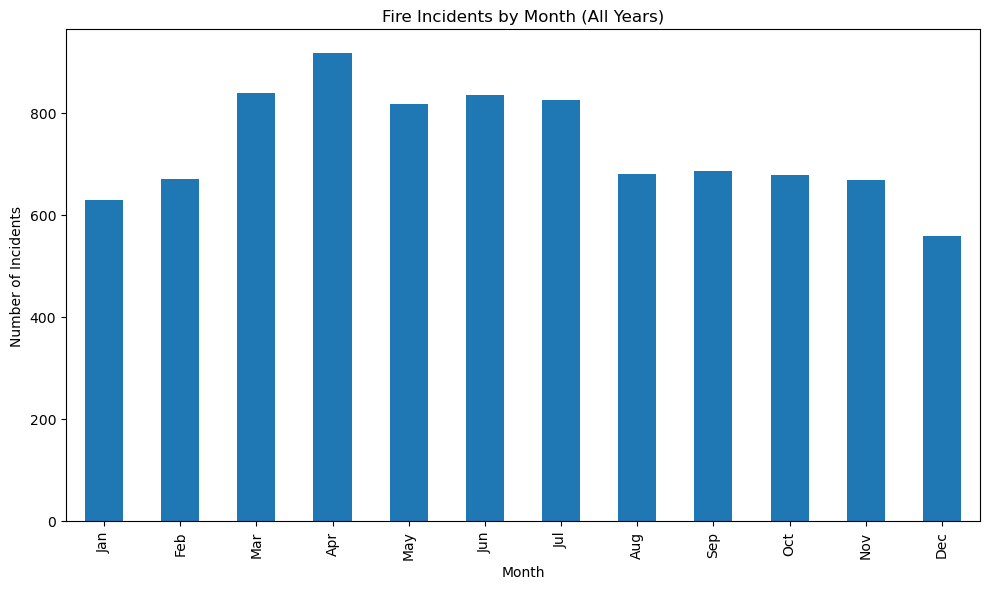

In [23]:
fire['month'] = fire['alarm_time'].dt.month

monthly_counts = fire['month'].value_counts().sort_index()
monthly_counts.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_counts.plot(kind='bar', title='Fire Incidents by Month (All Years)', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()

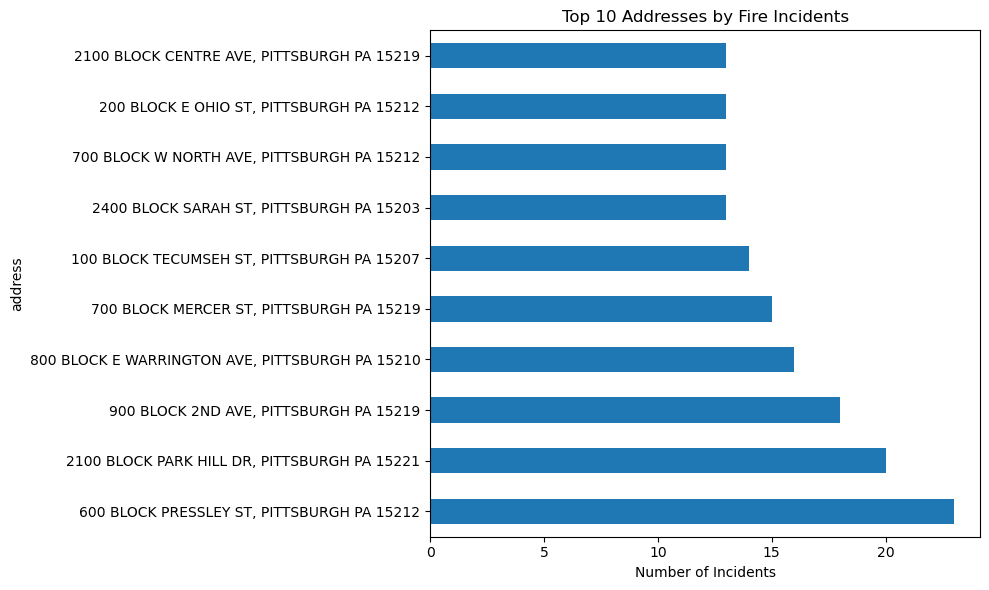

In [24]:
top_streets = fire['address'].value_counts().head(10)
top_streets.plot(kind='barh', title='Top 10 Addresses by Fire Incidents', figsize=(10, 6))
plt.xlabel('Number of Incidents')
plt.tight_layout()
plt.show()

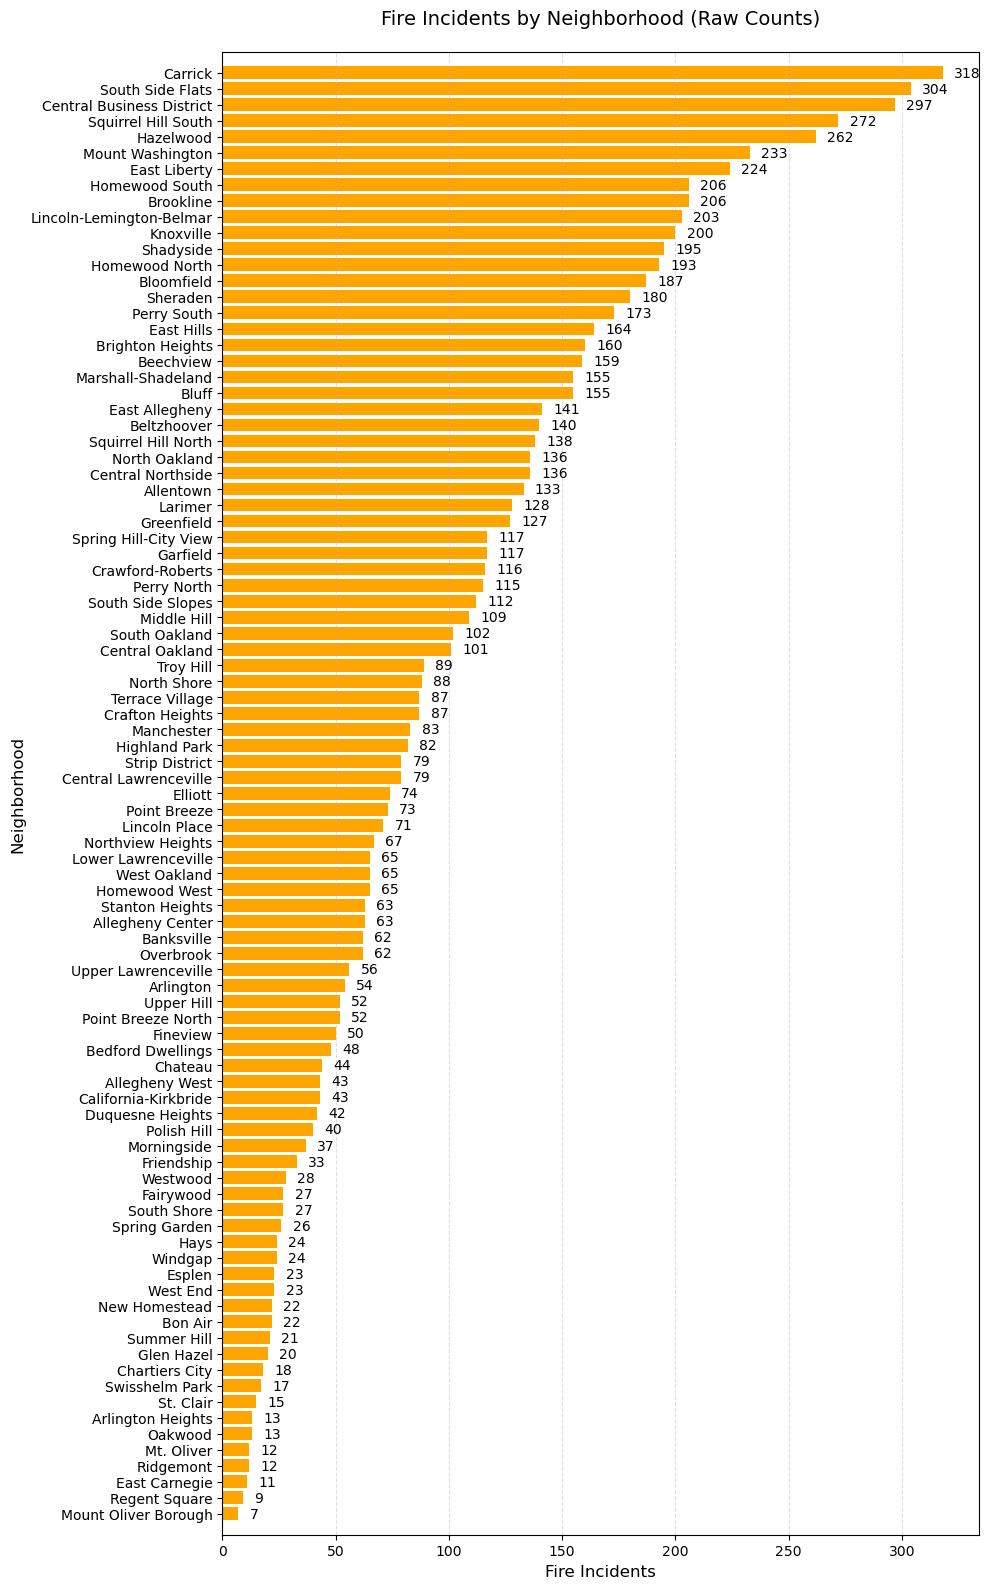

In [25]:
# Count fire incidents by neighborhood (ascending order)
fire_counts = fire['neighborhood'].value_counts().sort_values()

# Create horizontal bar plot
plt.figure(figsize=(10, 16))
bars = plt.barh(fire_counts.index, fire_counts.values, color='orange', height=0.8)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}',
             va='center', ha='left', fontsize=10)

# Formatting
plt.title('Fire Incidents by Neighborhood (Raw Counts)', fontsize=14, pad=20)
plt.xlabel('Fire Incidents', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.margins(y=0.01)
plt.tight_layout()
plt.show()

# Conclusion 

####  Analyzing fire incident data across Pittsburgh neighborhoods gives us helpful insight into how fire emergencies are spread out in the city. Some neighborhoods have more fire incidents than others, which could be due to different factors like the age of buildings, how many people live there, or how well safety rules are followed. These areas might need more attention from the city, such as better fire prevention programs, regular inspections, or faster emergency response systems. On the other hand, neighborhoods with fewer fire incidents may already have good safety habits in place or simply have fewer risks, like lower population density or newer buildings. Understanding these differences is important for making smart decisions about how to keep everyone safe. It helps city planners and emergency services focus their time and resources where they’re needed most. Overall, this data is useful for creating a safer and more prepared Pittsburgh.

# Firearm Seizure Metric Data Set

### We can identify the safer neighborhoods based on Firearm Seizures in Pittsburgh. Based on the data gathered from the Western Pennsylvania Regional Data Center, we have access to all neighborhoods within Pittsburgh where Firearms seems to be more prevalent as well how Firearm seizures have increased or decreased over the years. Knowing where firearms have been seized can give an idea of where they are sourced from and what areas to avoid.

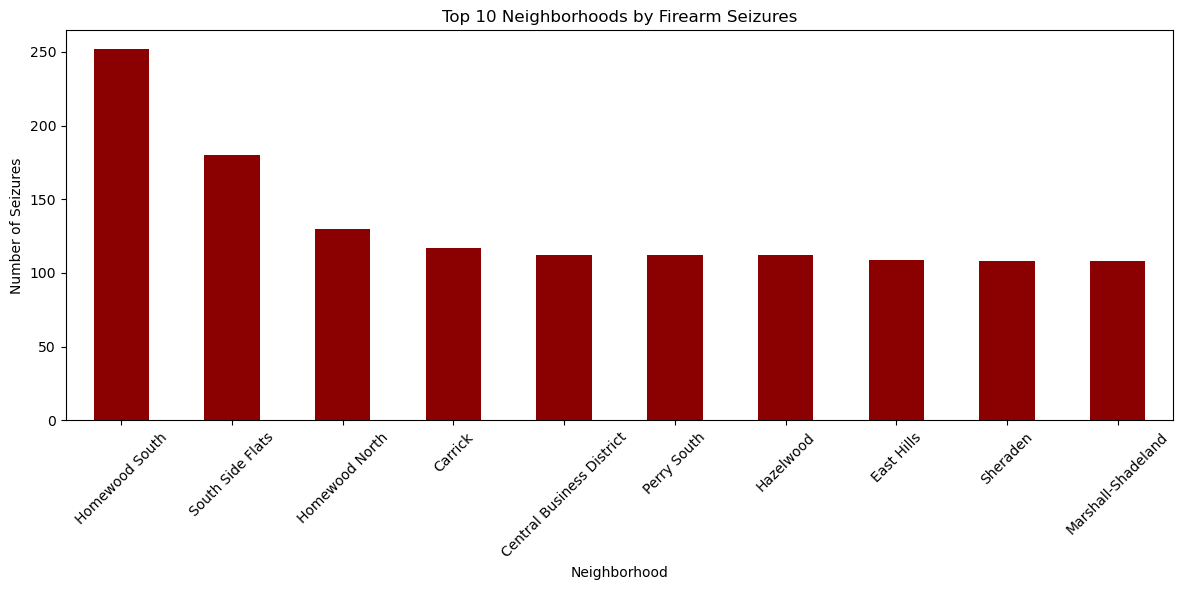

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#load dataset
firearm = pd.read_csv("data/firearms.csv")
firearm.head()

#keep important columns
columns_to_keep = ['neighborhood', 'council_district', 'ward', 'tract', 'police_zone', 'year']
firearm = firearm[columns_to_keep]

#remove missing data
firearm = firearm.dropna(subset=['neighborhood'])

#frequency of firearm seizures
neighborhood_counts = firearm['neighborhood'].value_counts()

#top 10 most seizures (worst for safety), vertical bar chart
plt.figure(figsize = (12, 6))
neighborhood_counts.sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'darkred')
plt.title('Top 10 Neighborhoods by Firearm Seizures')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Seizures')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Here we are able to see the Top 10 Neighborhoods with the most Firearm Seizures. Meaning these areas are not known to be safe.

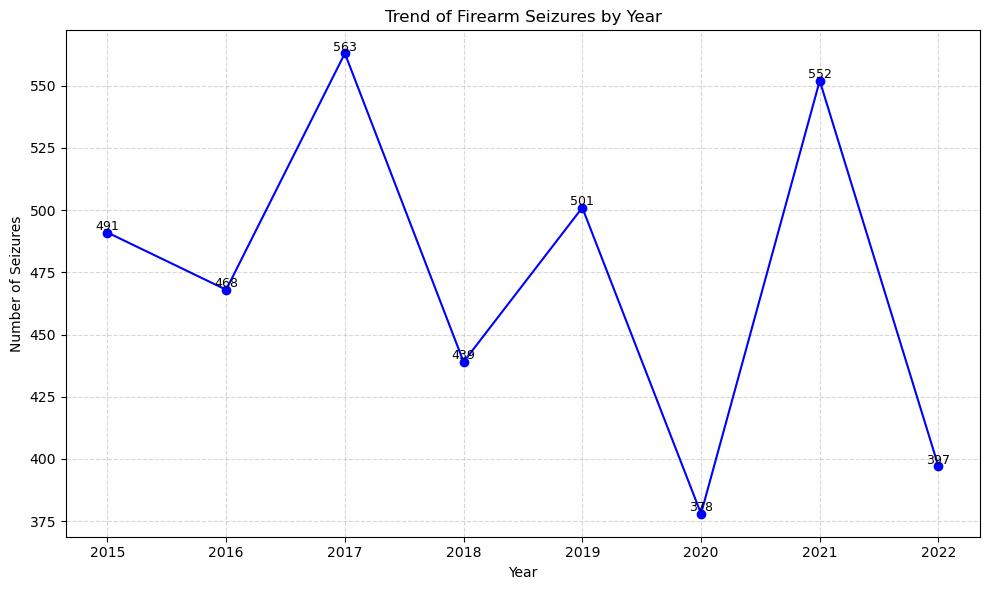

In [27]:
#firearm seizures by year, line plot
if 'year' in firearm.columns:
    year_counts = firearm['year'].value_counts().sort_index()

    plt.figure(figsize = (10, 6))
    plt.plot(year_counts.index, year_counts.values, marker = 'o', linestyle = '-', color = 'blue')
    plt.title('Trend of Firearm Seizures by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Seizures')
    for x, y in zip(year_counts.index, year_counts.values):
        plt.text(x, y + 1, str(y), ha = 'center', fontsize = 9)
    plt.grid(True, linestyle = '--', alpha = 0.5)
    plt.xticks(year_counts.index)
    plt.tight_layout()
    plt.show()

It is interesting to see that the number of firearm seizures vary greatly per year. It appears to flunctuate up every 2 years and back down.

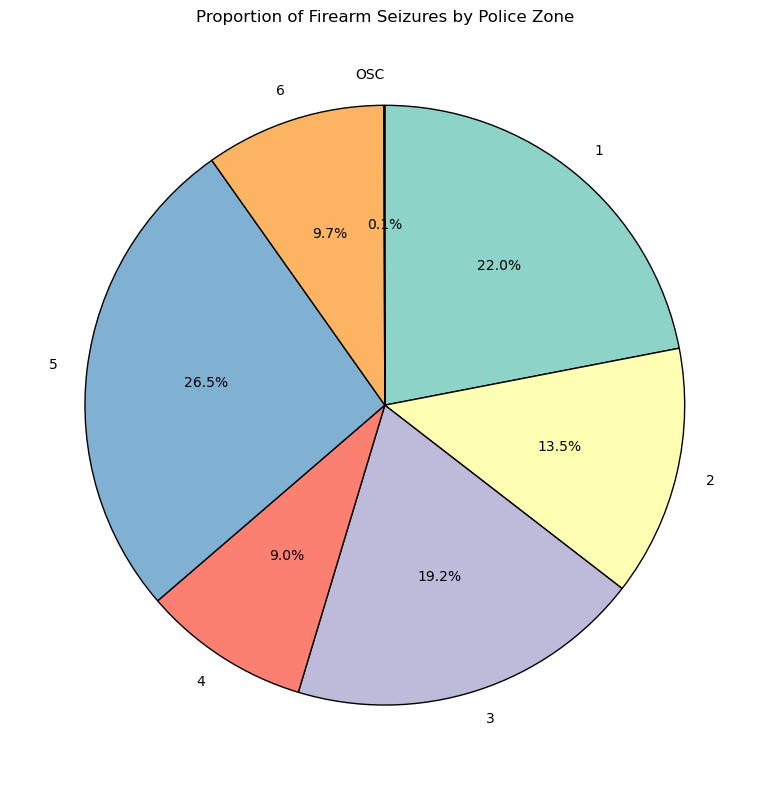

In [28]:
#Firearm seizures based on police zones, pie chart
if 'police_zone' in firearm.columns:
    zone_counts = firearm['police_zone'].value_counts().sort_index()

    plt.figure(figsize=(8, 8))
    zone_counts.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False, 
                         colors=plt.cm.Set3.colors, wedgeprops={'edgecolor': 'black'})
    plt.title('Proportion of Firearm Seizures by Police Zone')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

Here, it is apparent that Police Zone #5 (East Liberty), followed by Police Zone #1 (North Side), has the most firearm seizures.

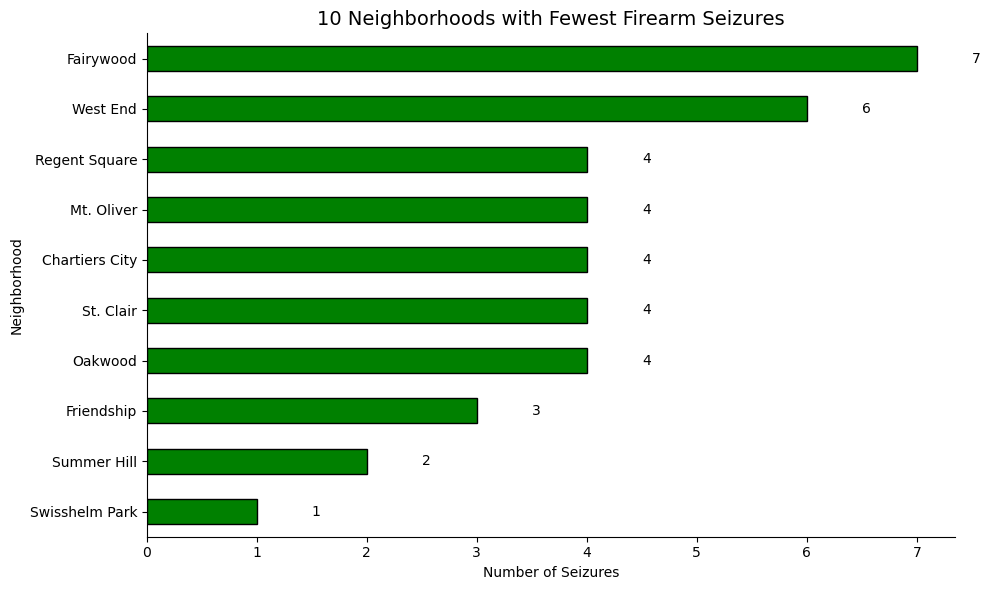

In [29]:
#bottom 10 seizures (best for safety), horizontal bar chart
bottom_10 = neighborhood_counts.sort_values().head(10)

plt.figure(figsize = (10, 6))
ax = bottom_10.plot(kind = 'barh', color = 'green', edgecolor = 'black')
plt.title('10 Neighborhoods with Fewest Firearm Seizures', fontsize = 14)
plt.xlabel('Number of Seizures')
plt.ylabel('Neighborhood')

for i, v in enumerate(bottom_10):
    plt.text(v + 0.5, i, str(v), va = 'center', fontsize = 10)

#remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

### Conclusion
As I am new to the area of Pittsburgh, I didn't have much knowledge as to what to expect in terms of frequency of firearm seizures in each neighborhood. I generally had a belief that the neighborhoods near Downtown or past Allegheny River and Monongahela River were known to be on the more dangerous end. I can see based on the data that the far east side of Pittsburgh campus is seen to be generally dangerous, which is shocking due to the fact that I frequent there to visit an animal shelter. It's difficult to assess from the exterior neighborhood where firearm activity is most prevalent, but this dataset allows us to use real evidence to identify those areas more accurately.




## 🧪 Loading, Merging, and Scoring the Data

To calculate a final safety score for each Pittsburgh neighborhood, we:

- Merged each dataset by neighborhood
- Counted the number of incidents for each type
- Standardized the data using z-scores to account for different scales
- Applied custom weights to each category (e.g., arrests matter more than citations)
- Calculated a composite **safety score** and normalized it to a 0–100 scale, where 100 represents the safest possible score

This score lets us fairly compare neighborhoods based on multiple safety-related indicators.

Z-score indicates 

In [33]:
import pandas as pd
import numpy as np
import os

# Verify the data directory exists
if not os.path.exists('data'):
    raise FileNotFoundError("The 'data' directory does not exist in the current working directory")

# List files in data directory to verify
print("Files in data directory:")
print(os.listdir('data'))

# Load datasets from data/ directory
try:
    citations = pd.read_csv('data/citations.csv')
    arrests = pd.read_csv('data/pgharrests.csv') 
    fires = pd.read_csv('data/fire_incidents.csv')
    firearms = pd.read_csv('data/firearms.csv')
    
    print("\nSuccessfully loaded all datasets!")
    print(f"Citations shape: {citations.shape}")
    print(f"Arrests shape: {arrests.shape}")
    print(f"Fires shape: {fires.shape}")
    print(f"Firearms shape: {firearms.shape}")
    
except FileNotFoundError as e:
    print(f"\nError loading files: {e}")
    print("Please verify:")
    print("1. The 'data' directory exists")
    print("2. All files are named exactly as shown above")
    print("3. Files have .csv extension")
    print("\nFiles found in data directory:", os.listdir('data'))
    raise

Files in data directory:
['Neighborhoods_.shp', 'Neighborhoods_.cpg', 'Neighborhoods_.shx', 'fire_incidents.csv', 'City_of_Pittsburgh_Neighborhoods.xml', 'City_of_Pittsburgh_Neighborhoods.dbf', 'City_of_Pittsburgh_Neighborhoods.shx', 'pittsburgh_neighborhoods.shp', 'City_of_Pittsburgh_Neighborhoods.shp', 'City_of_Pittsburgh_Neighborhoods.cpg', 'Neighborhoods_.dbf', 'pgharrests.csv', 'citations.csv', 'Neighborhoods_.prj', 'firearms.csv', 'City_of_Pittsburgh_Neighborhoods.prj']

Successfully loaded all datasets!
Citations shape: (16295, 16)
Arrests shape: (66485, 17)
Fires shape: (10489, 19)
Firearms shape: (4570, 20)


In [ ]:
# First, let's inspect the shapefile's structure
neighborhoods_gdf = gpd.read_file('data/City_of_Pittsburgh_Neighborhoods.shp')
print("Available columns in shapefile:")
print(neighborhoods_gdf.columns.tolist())

# Look for neighborhood name columns (common alternatives)
possible_neighborhood_cols = ['hood', 'neighborhood', 'name', 'HOOD', 'Neighborhood', 'NAME']
found_col = None

for col in possible_neighborhood_cols:
    if col in neighborhoods_gdf.columns:
        found_col = col
        break

if not found_col:
    raise KeyError(f"No neighborhood identifier column found. Available columns: {neighborhoods_gdf.columns.tolist()}")

print(f"\nUsing column '{found_col}' for neighborhood names")

# Now use the correct column name
neighborhoods = neighborhoods_gdf[[found_col]].rename(columns={found_col: 'hood'})

# Proceed with merging
safety_data = neighborhoods.merge(
    citation_counts, left_on='hood', right_index=True, how='left'
).merge(
    arrest_counts, left_on='hood', right_index=True, how='left'
).merge(
    fire_counts, left_on='hood', right_index=True, how='left'
).merge(
    firearm_counts, left_on='hood', right_index=True, how='left'
).fillna(0)

# Show the first few rows to verify
print("\nMerged data preview:")
print(safety_data.head())

Available columns in shapefile:
['OBJECTID', 'FID_BlockG', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLKGRPCE10', 'GEOID10', 'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'Shape_Leng', 'FID_Neighb', 'AREA', 'PERIMETER', 'NEIGHBOR_', 'NEIGHBOR_I', 'HOOD', 'HOOD_NO', 'ACRES', 'SQMILES', 'DPWDIV', 'UNIQUE_ID', 'SECTORS', 'Shape_Le_1', 'Shape_Ar_1', 'Shape_Le_2', 'Page_Numbe', 'Shape_Le_3', 'Shape_Le_4', 'Shape_Area', 'geometry']

Using column 'HOOD' for neighborhood names

Merged data preview:
               hood  citation_count  arrest_count  fire_count  firearm_count
0   Central Oakland           665.0         521.0         101           16.0
1     North Oakland           199.0         455.0         136           15.0
2      West Oakland            63.0         325.0          65           13.0
3  Crawford-Roberts           102.0         839.0         116           50.0
4    Strip District           101.0         503.0          79           22.0

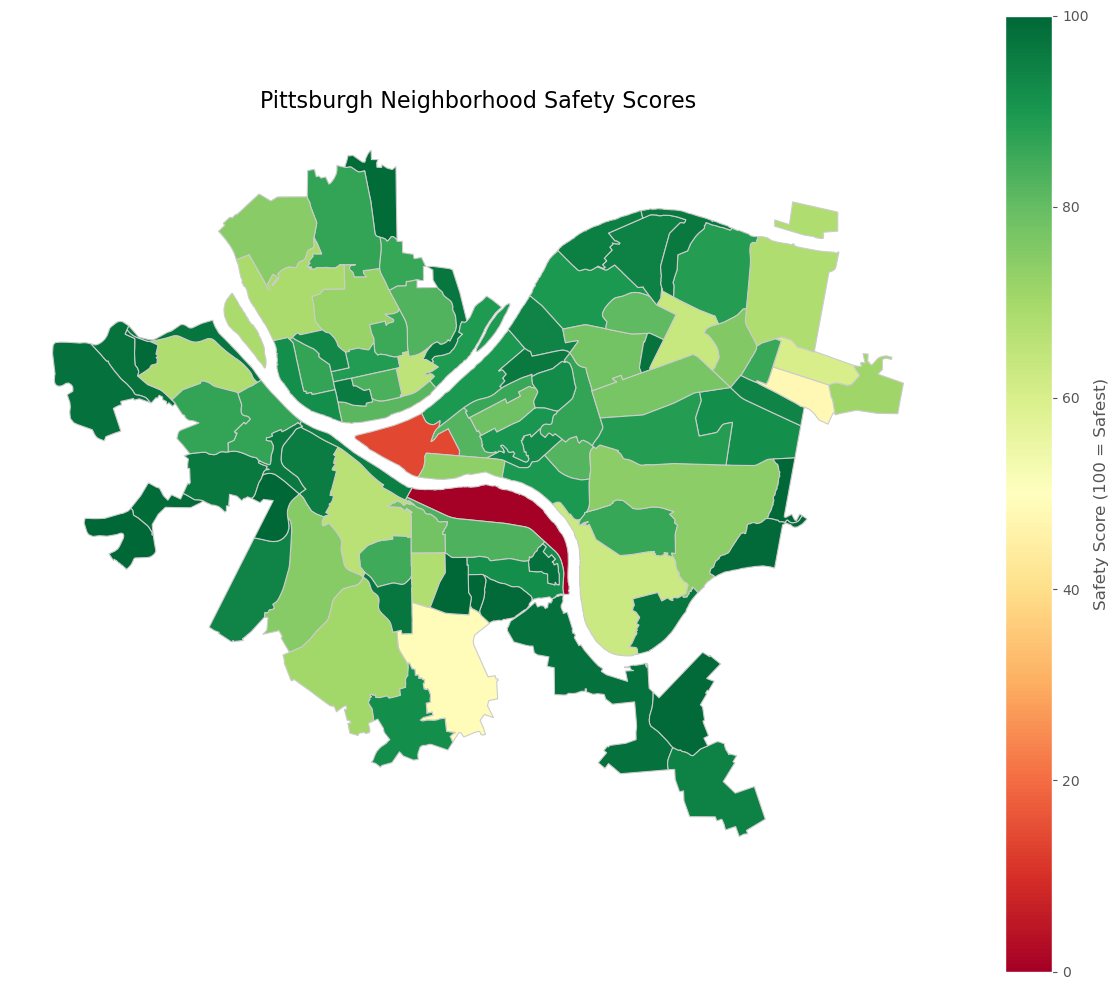

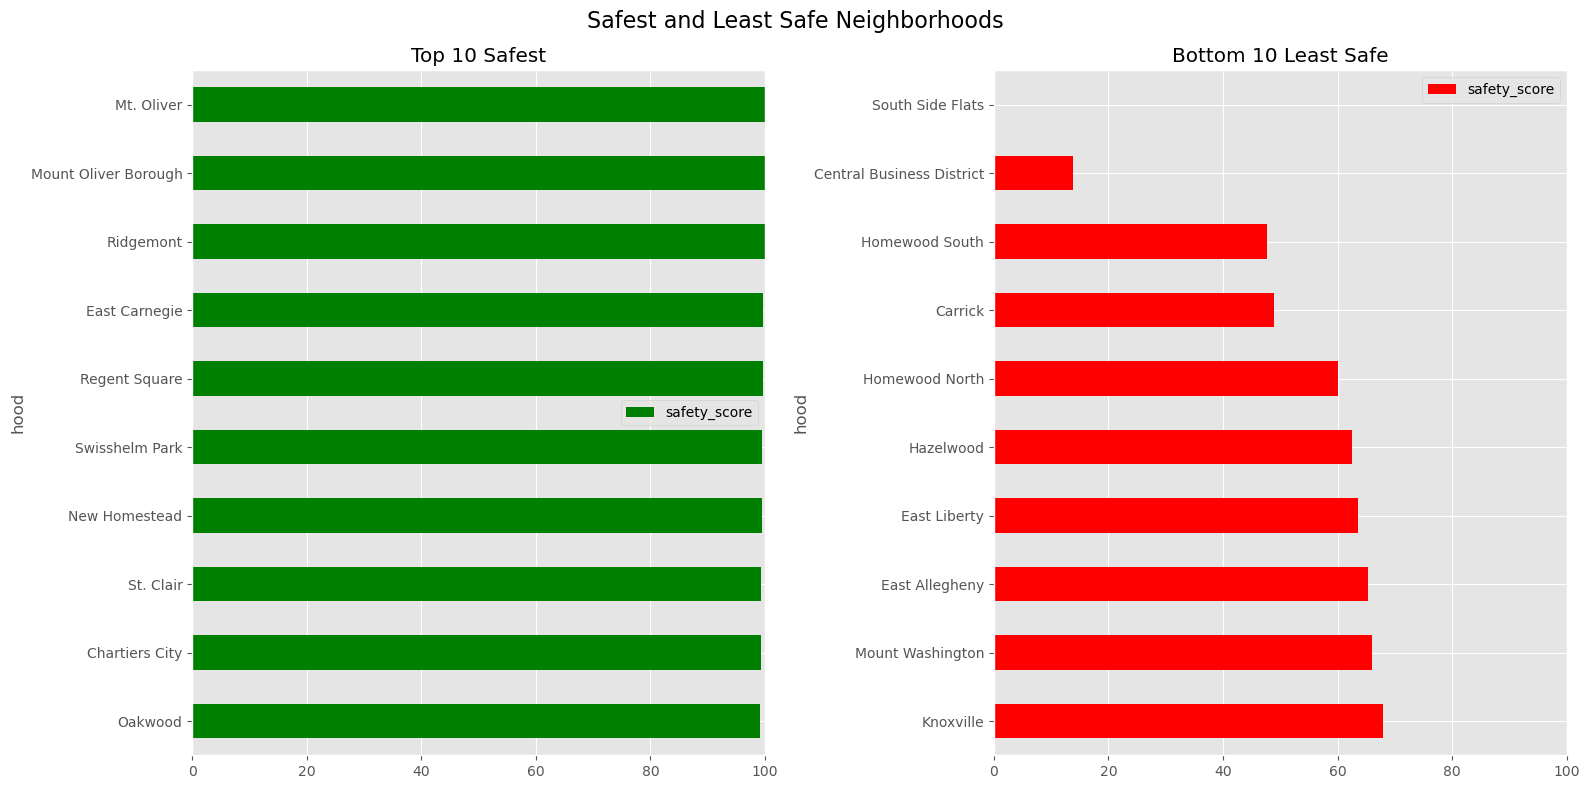


Pittsburgh Neighborhood Safety Rankings:
                     hood  safety_score
               Mt. Oliver    100.000000
     Mount Oliver Borough     99.990278
                Ridgemont     99.968663
            East Carnegie     99.716804
            Regent Square     99.716653
           Swisshelm Park     99.557144
            New Homestead     99.407605
                St. Clair     99.324493
           Chartiers City     99.255641
                  Oakwood     99.103423
              Summer Hill     98.965071
        Arlington Heights     98.138995
                     Hays     97.968098
                Fairywood     97.699602
                  Windgap     97.497020
               Friendship     97.291257
                   Esplen     96.903645
            Spring Garden     96.798699
               Glen Hazel     96.767886
                  Bon Air     96.485208
              Polish Hill     96.399280
                 West End     96.334307
                 Westwood     96.25668

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

# 1. Data Preparation
neighborhoods = gpd.read_file('data/City_of_Pittsburgh_Neighborhoods.shp')[['HOOD', 'geometry']].rename(columns={'HOOD': 'hood'})

# 2. Data Aggregation
# -------------------
# Aggregate counts per neighborhood 
citation_counts = citations['NEIGHBORHOOD'].value_counts().rename('citation_count')
arrest_counts = arrests['INCIDENTNEIGHBORHOOD'].value_counts().rename('arrest_count')
fire_counts = fires['neighborhood'].value_counts().rename('fire_count')
firearm_counts = firearms['neighborhood'].value_counts().rename('firearm_count')

# 3. Data Merging
# ---------------
safety_data = neighborhoods.merge(
    citation_counts, left_on='hood', right_index=True, how='left'
).merge(
    arrest_counts, left_on='hood', right_index=True, how='left'
).merge(
    fire_counts, left_on='hood', right_index=True, how='left'
).merge(
    firearm_counts, left_on='hood', right_index=True, how='left'
).fillna(0)

# 4. Safety Score Calculation
# ---------------------------
# Calculate z-scores
for col in ['citation_count', 'arrest_count', 'fire_count', 'firearm_count']:
    safety_data[f'{col}_z'] = (
        (safety_data[col] - safety_data[col].mean()) / safety_data[col].std()
    )

# Create weighted safety score (higher = safer)
weights = {
    'citation': -0.25,  # Negative because more citations = less safe
    'arrest': -0.35,
    'fire': -0.2,
    'firearm': -0.2
}

safety_data['safety_score'] = (
    safety_data['citation_count_z'] * weights['citation'] +
    safety_data['arrest_count_z'] * weights['arrest'] +
    safety_data['fire_count_z'] * weights['fire'] +
    safety_data['firearm_count_z'] * weights['firearm']
)

# Normalize to 0-100 scale (100 = safest)
safety_data['safety_score'] = (
    (safety_data['safety_score'] - safety_data['safety_score'].min()) / 
    (safety_data['safety_score'].max() - safety_data['safety_score'].min()) * 100
)

# 5. Generate Visualizations
# --------------------------
plt.style.use('ggplot')

# A. Safety Choropleth Map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
safety_data.plot(column='safety_score', 
                cmap='RdYlGn', 
                linewidth=0.8, 
                ax=ax, 
                edgecolor='0.8', 
                legend=True,
                legend_kwds={'label': "Safety Score (100 = Safest)"})
ax.set_title('Pittsburgh Neighborhood Safety Scores', fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

# B. Top/Bottom 10 Neighborhoods
top10 = safety_data.nlargest(10, 'safety_score')
bottom10 = safety_data.nsmallest(10, 'safety_score')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Safest and Least Safe Neighborhoods', fontsize=16)

top10.sort_values('safety_score').plot.barh(
    x='hood', y='safety_score', ax=ax1, color='green')
ax1.set_title('Top 10 Safest')
ax1.set_xlim(0, 100)

bottom10.sort_values('safety_score', ascending=False).plot.barh(
    x='hood', y='safety_score', ax=ax2, color='red')
ax2.set_title('Bottom 10 Least Safe')
ax2.set_xlim(0, 100)

plt.tight_layout()
plt.show()

print("\nPittsburgh Neighborhood Safety Rankings:")
print(safety_data[['hood', 'safety_score']]
      .sort_values('safety_score', ascending=False)
      .to_string(index=False))

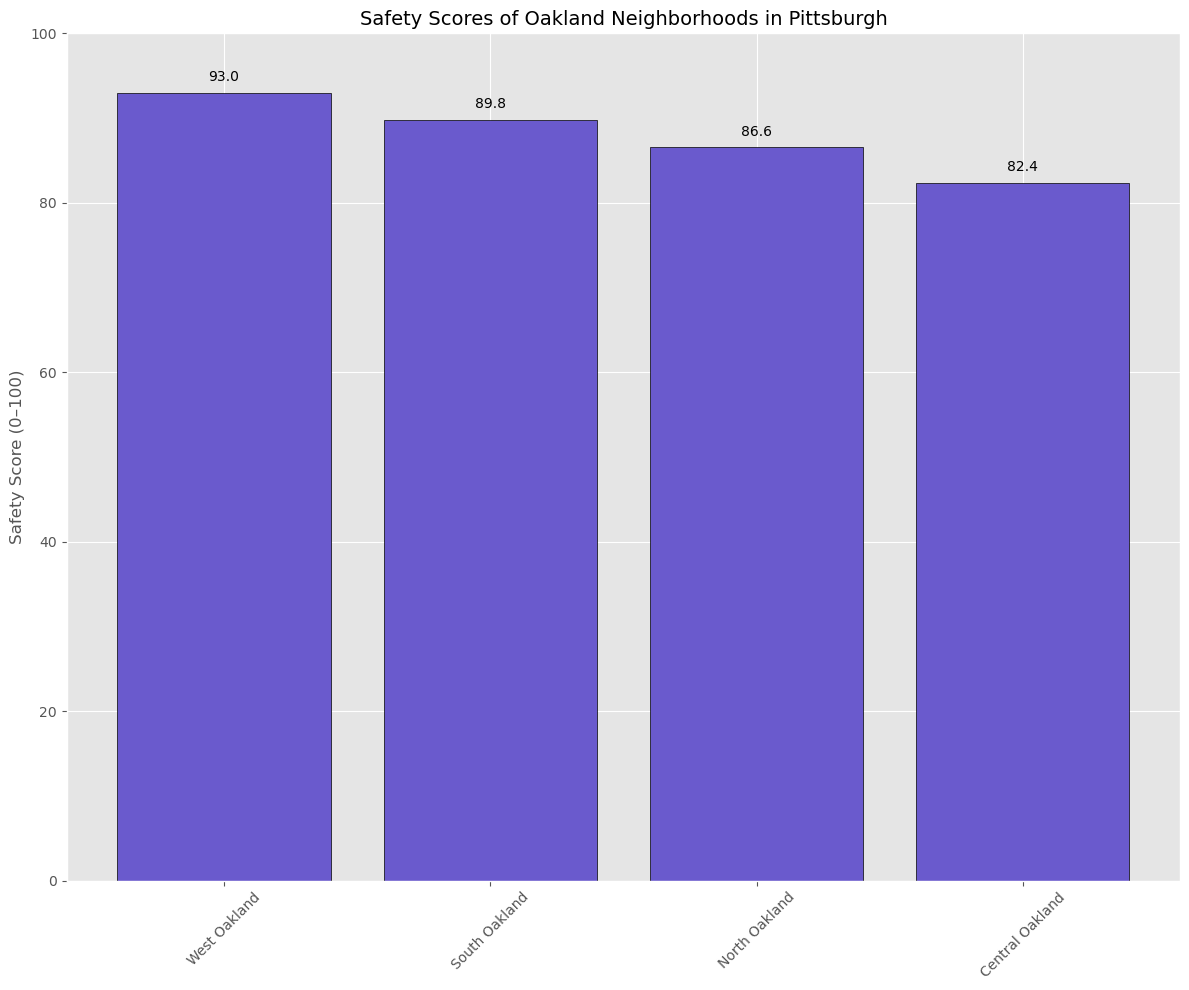

In [42]:
import matplotlib.pyplot as plt

# Define Oakland neighborhoods
oakland_hoods = ['North Oakland', 'South Oakland', 'Central Oakland', 'West Oakland', 'East Oakland']

# Filter and sort
oakland_scores = safety_data[safety_data['hood'].isin(oakland_hoods)].sort_values('safety_score', ascending=False)

# Plot
plt.figure(figsize=(12, 10))
bars = plt.bar(oakland_scores['hood'], oakland_scores['safety_score'], color='slateblue', edgecolor='black')
plt.title('Safety Scores of Oakland Neighborhoods in Pittsburgh', fontsize=14)
plt.ylabel('Safety Score (0–100)')
plt.ylim(0, 100)
plt.xticks(rotation=45)

# Add score labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


## ✅ Results and Takeaways

The final output includes:
- A **map** showing safety scores across Pittsburgh neighborhoods
- Two **bar charts** highlighting the top 10 safest and bottom 10 least safe neighborhoods
- A **ranked list** of all neighborhoods based on our composite safety metric

Neighborhoods like **Mt. Oliver**, **Regent Square**, and **East Carnegie** scored among the highest, suggesting low overall incident rates across all categories. On the other end of the spectrum, areas like the **South Side Flats** and **Central Business District** ranked lower due to higher counts of disturbances, arrests, or other safety concerns.

This combined approach provides a fuller picture than any single dataset could, helping us answer the question: *Where in Pittsburgh do people experience the fewest signs of public safety risk?*
